# Team 11 - Project Workflow and Report

## The impact of COVID on Animal Shelter Intake & Outcome Trends

### Project Description

For this project we have three datasets. Austin covid cases over time, Austin animal center intakes and Austin animal center outcomes.
The datasets include details about animal shelter intakes for dogs and cats and the outcomes. The idea of the project is to analyze the trends in Intake and Outcome in Animal Shelters and also analyze the impact of COVID on these trends.

The main goal of this project is to analyze the impact of COVID cases on animal shelter intakes and outcomes.

1. The Intake types for Animal Shelters include ‘Stray’, ‘Owner Surrender’ etc. We would like to compare the intake trends pre-covid and during covid. Did the animal shelter have more ‘Stray’ and ‘Owner Surrender’ intakes during covid than before?
2. The Outcomes types include ‘Adoption’, ‘Return to Owner’ among other types. We would like to compare the adoption trends pre-covid and during covid. Did the adoptions go up during covid?

<h2>ER Diagram</h2>

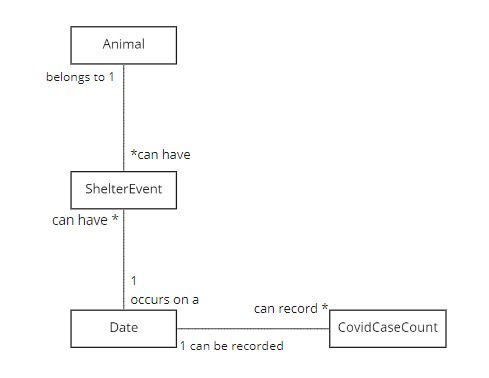

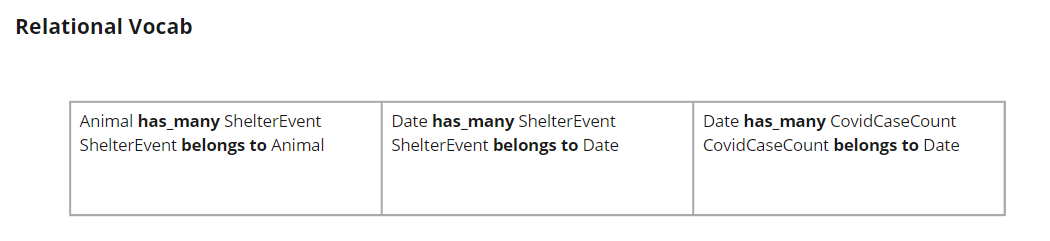

### Sample Table Structure

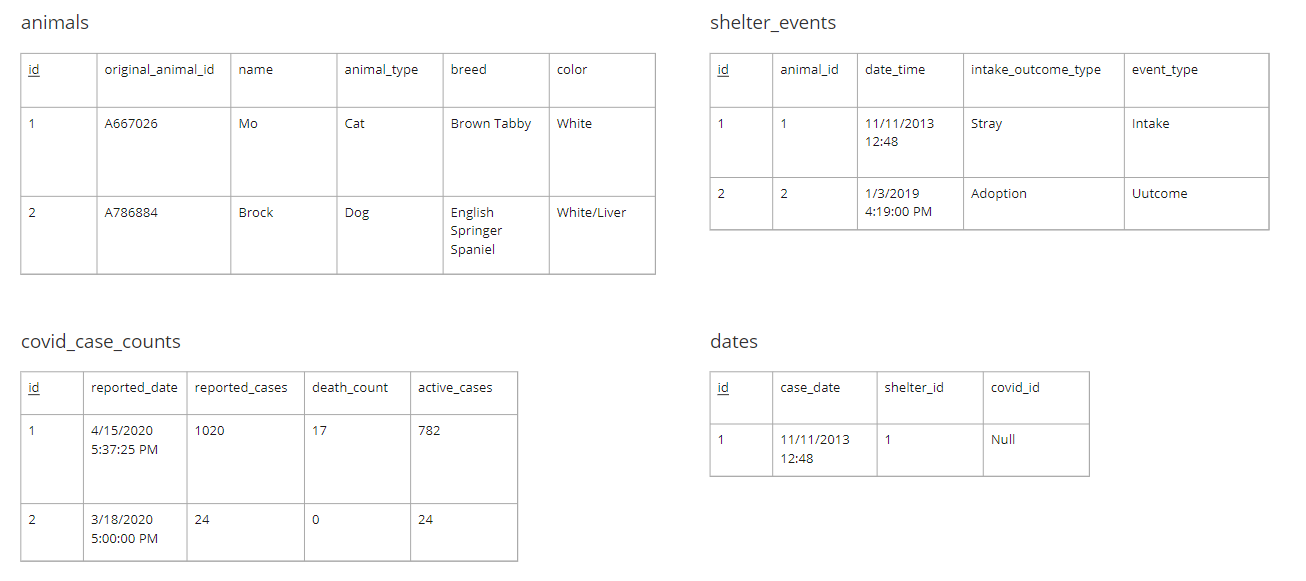

<h2>Data Sources</h2>

<h3>Animal Shelter Intakes</h3>

**Source:**
https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm/data

**CSV:**
https://drive.google.com/file/d/1AmbvO3lrdY6QuA3WlpbV7GVeYEq6E_NO/view?usp=sharing

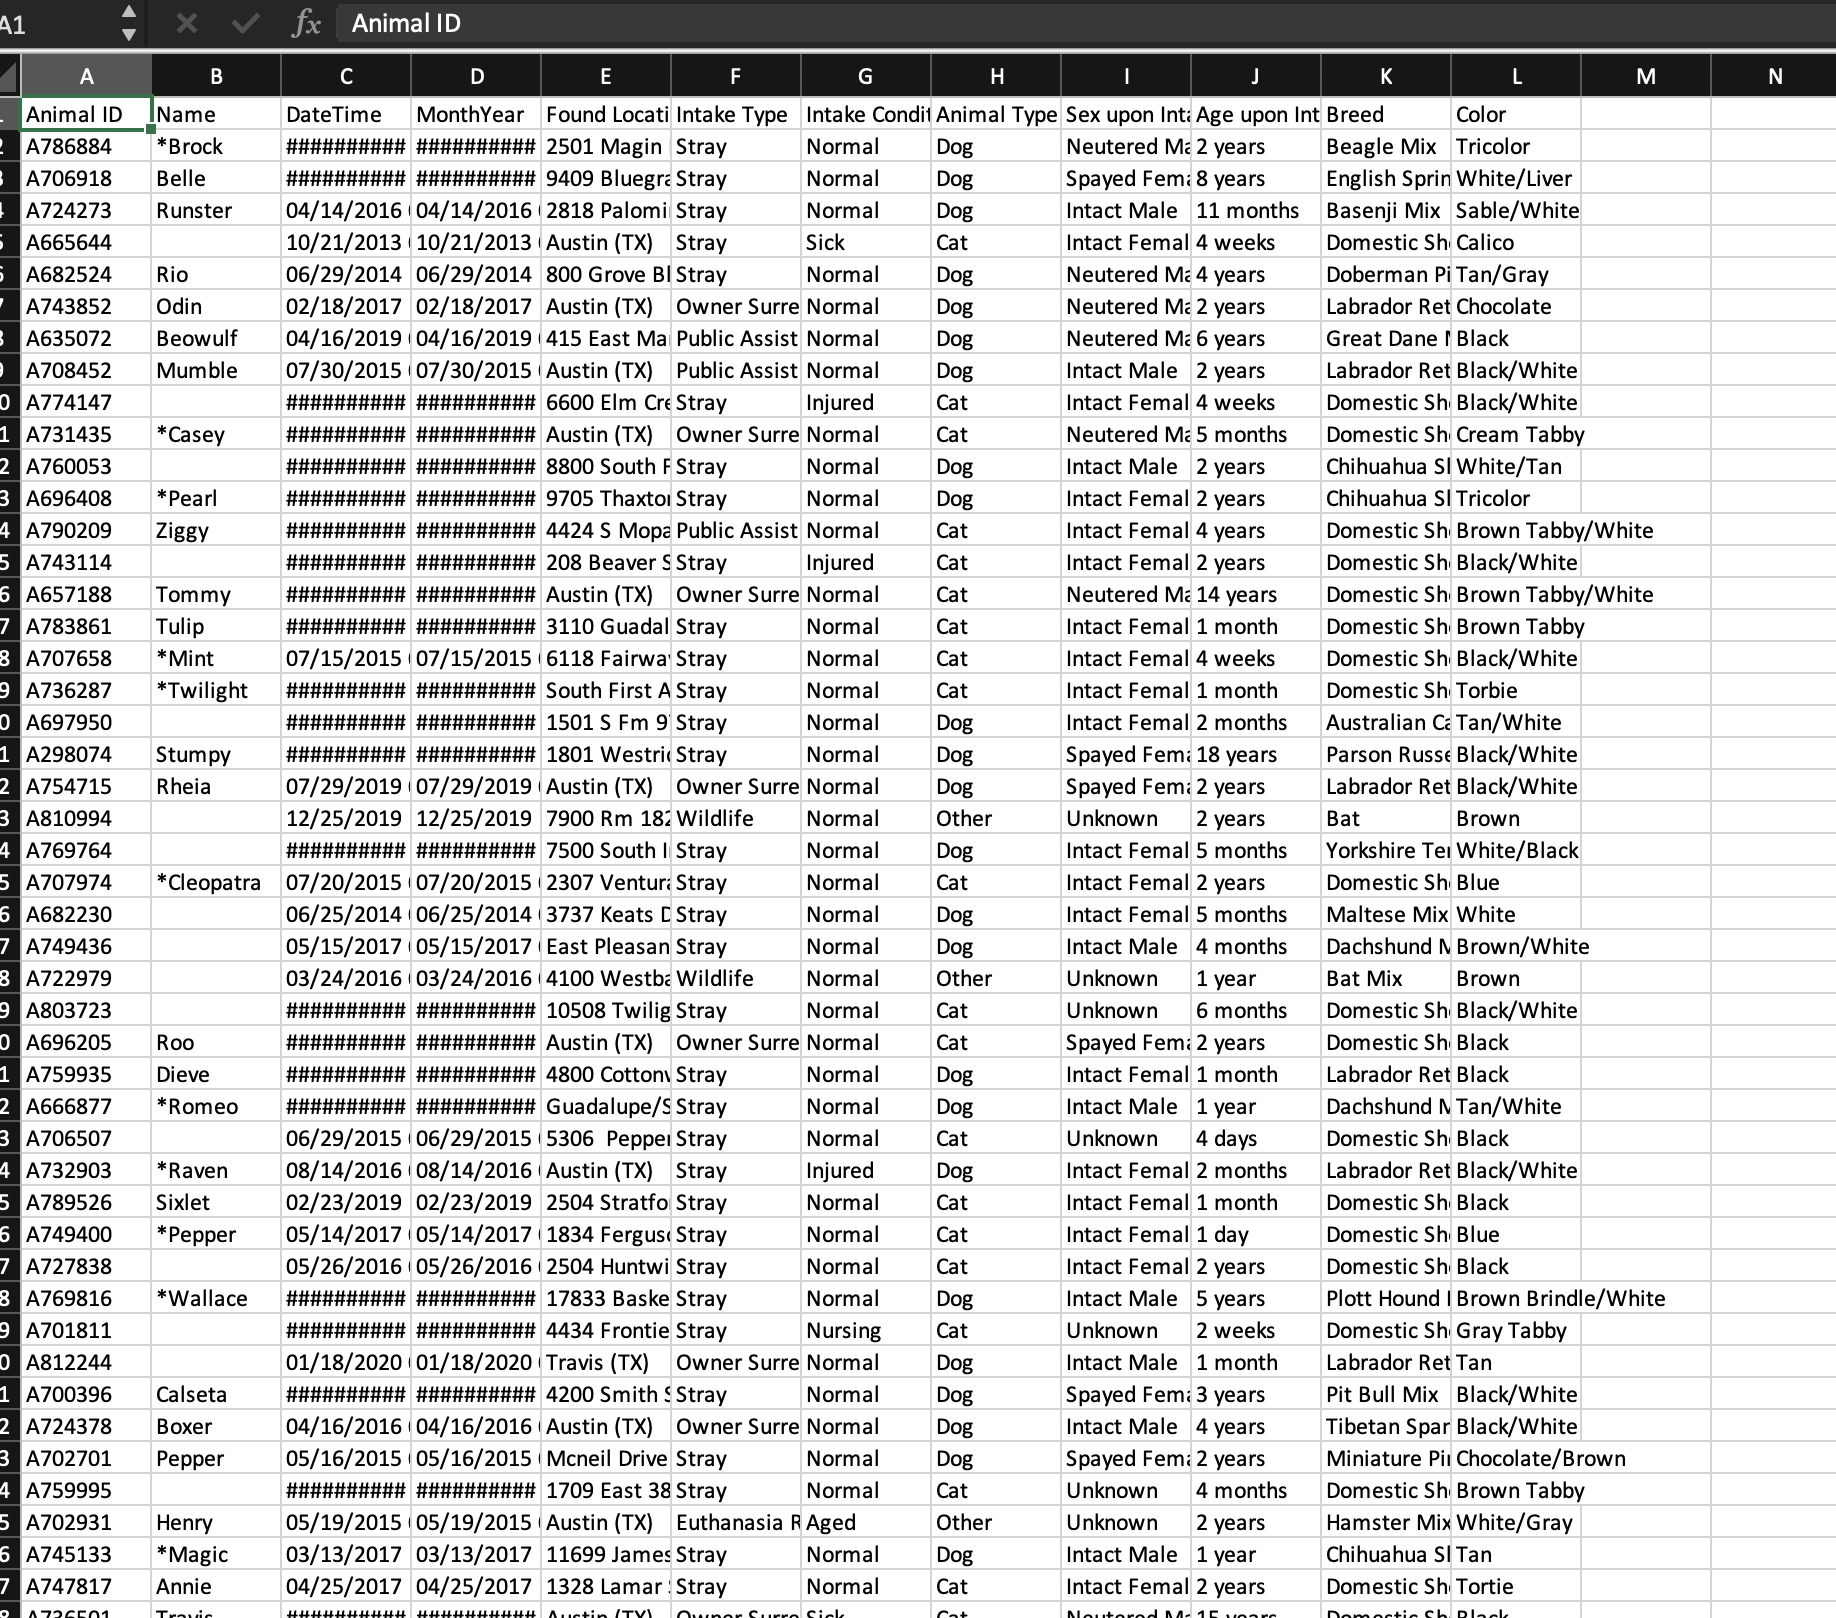




<h3>Animal Shelter Outcomes</h3>

**Source:**https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238/data

**CSV:**https://drive.google.com/file/d/14utaIYAKap2ahKf4xh-6Y98yzkQtLAVV/view?usp=sharing


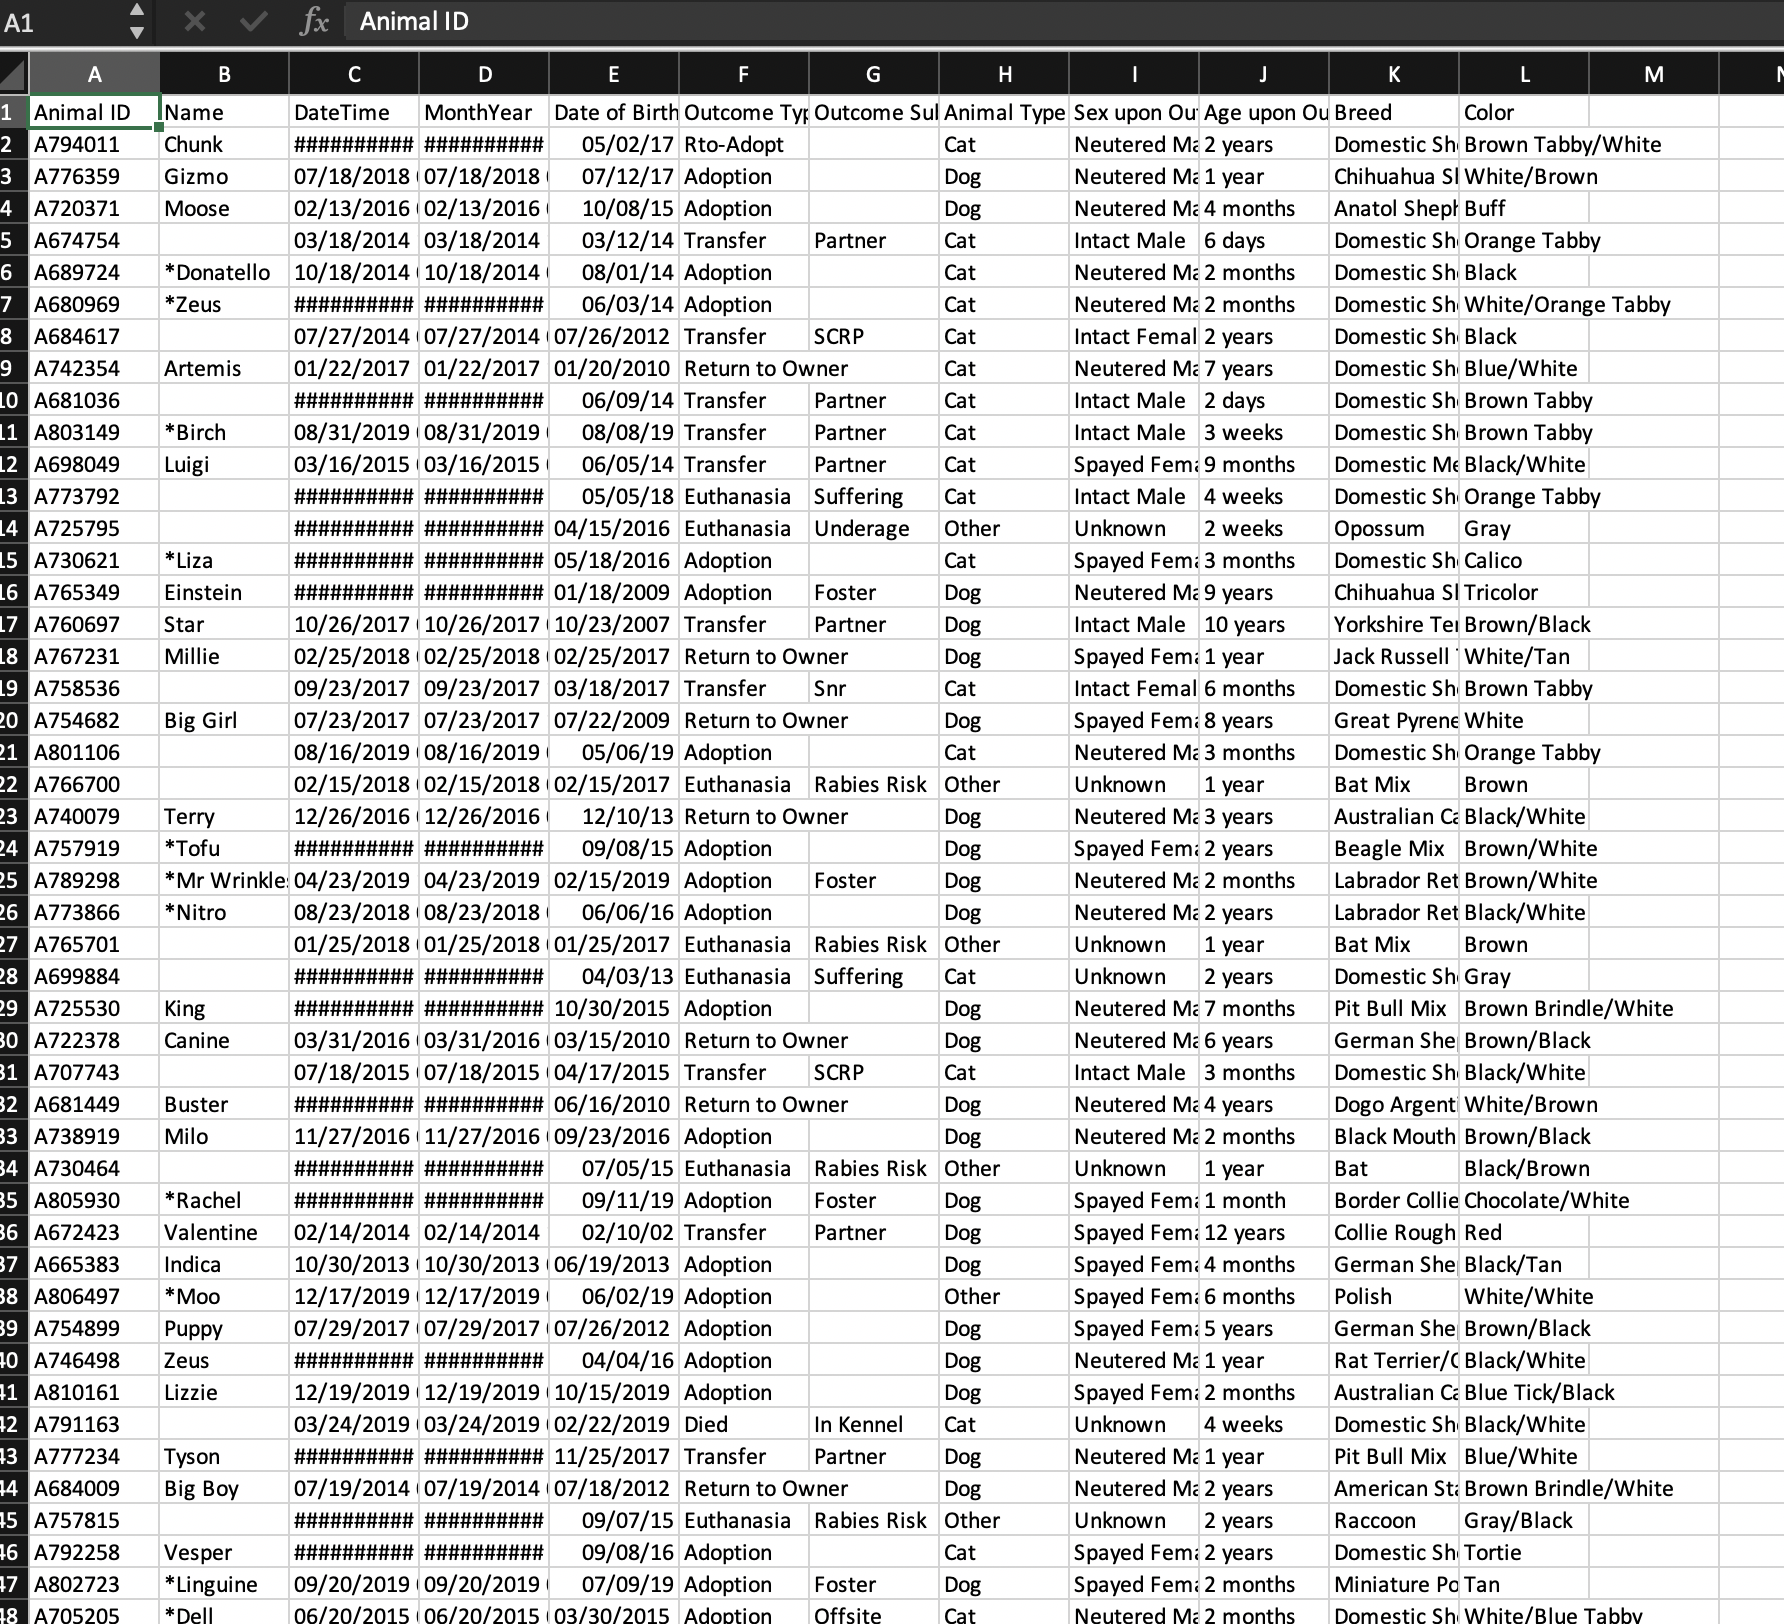

<h3>COVID cases in Travis County</h3>


**Source:**https://experience.arcgis.com/experience/3793562ab87e4299b106e0c282bb1fc5

**CSV:**https://drive.google.com/file/d/1QEesdn-wnp1_zEnfin5yxXV57fiVfyDW/view?usp=sharing


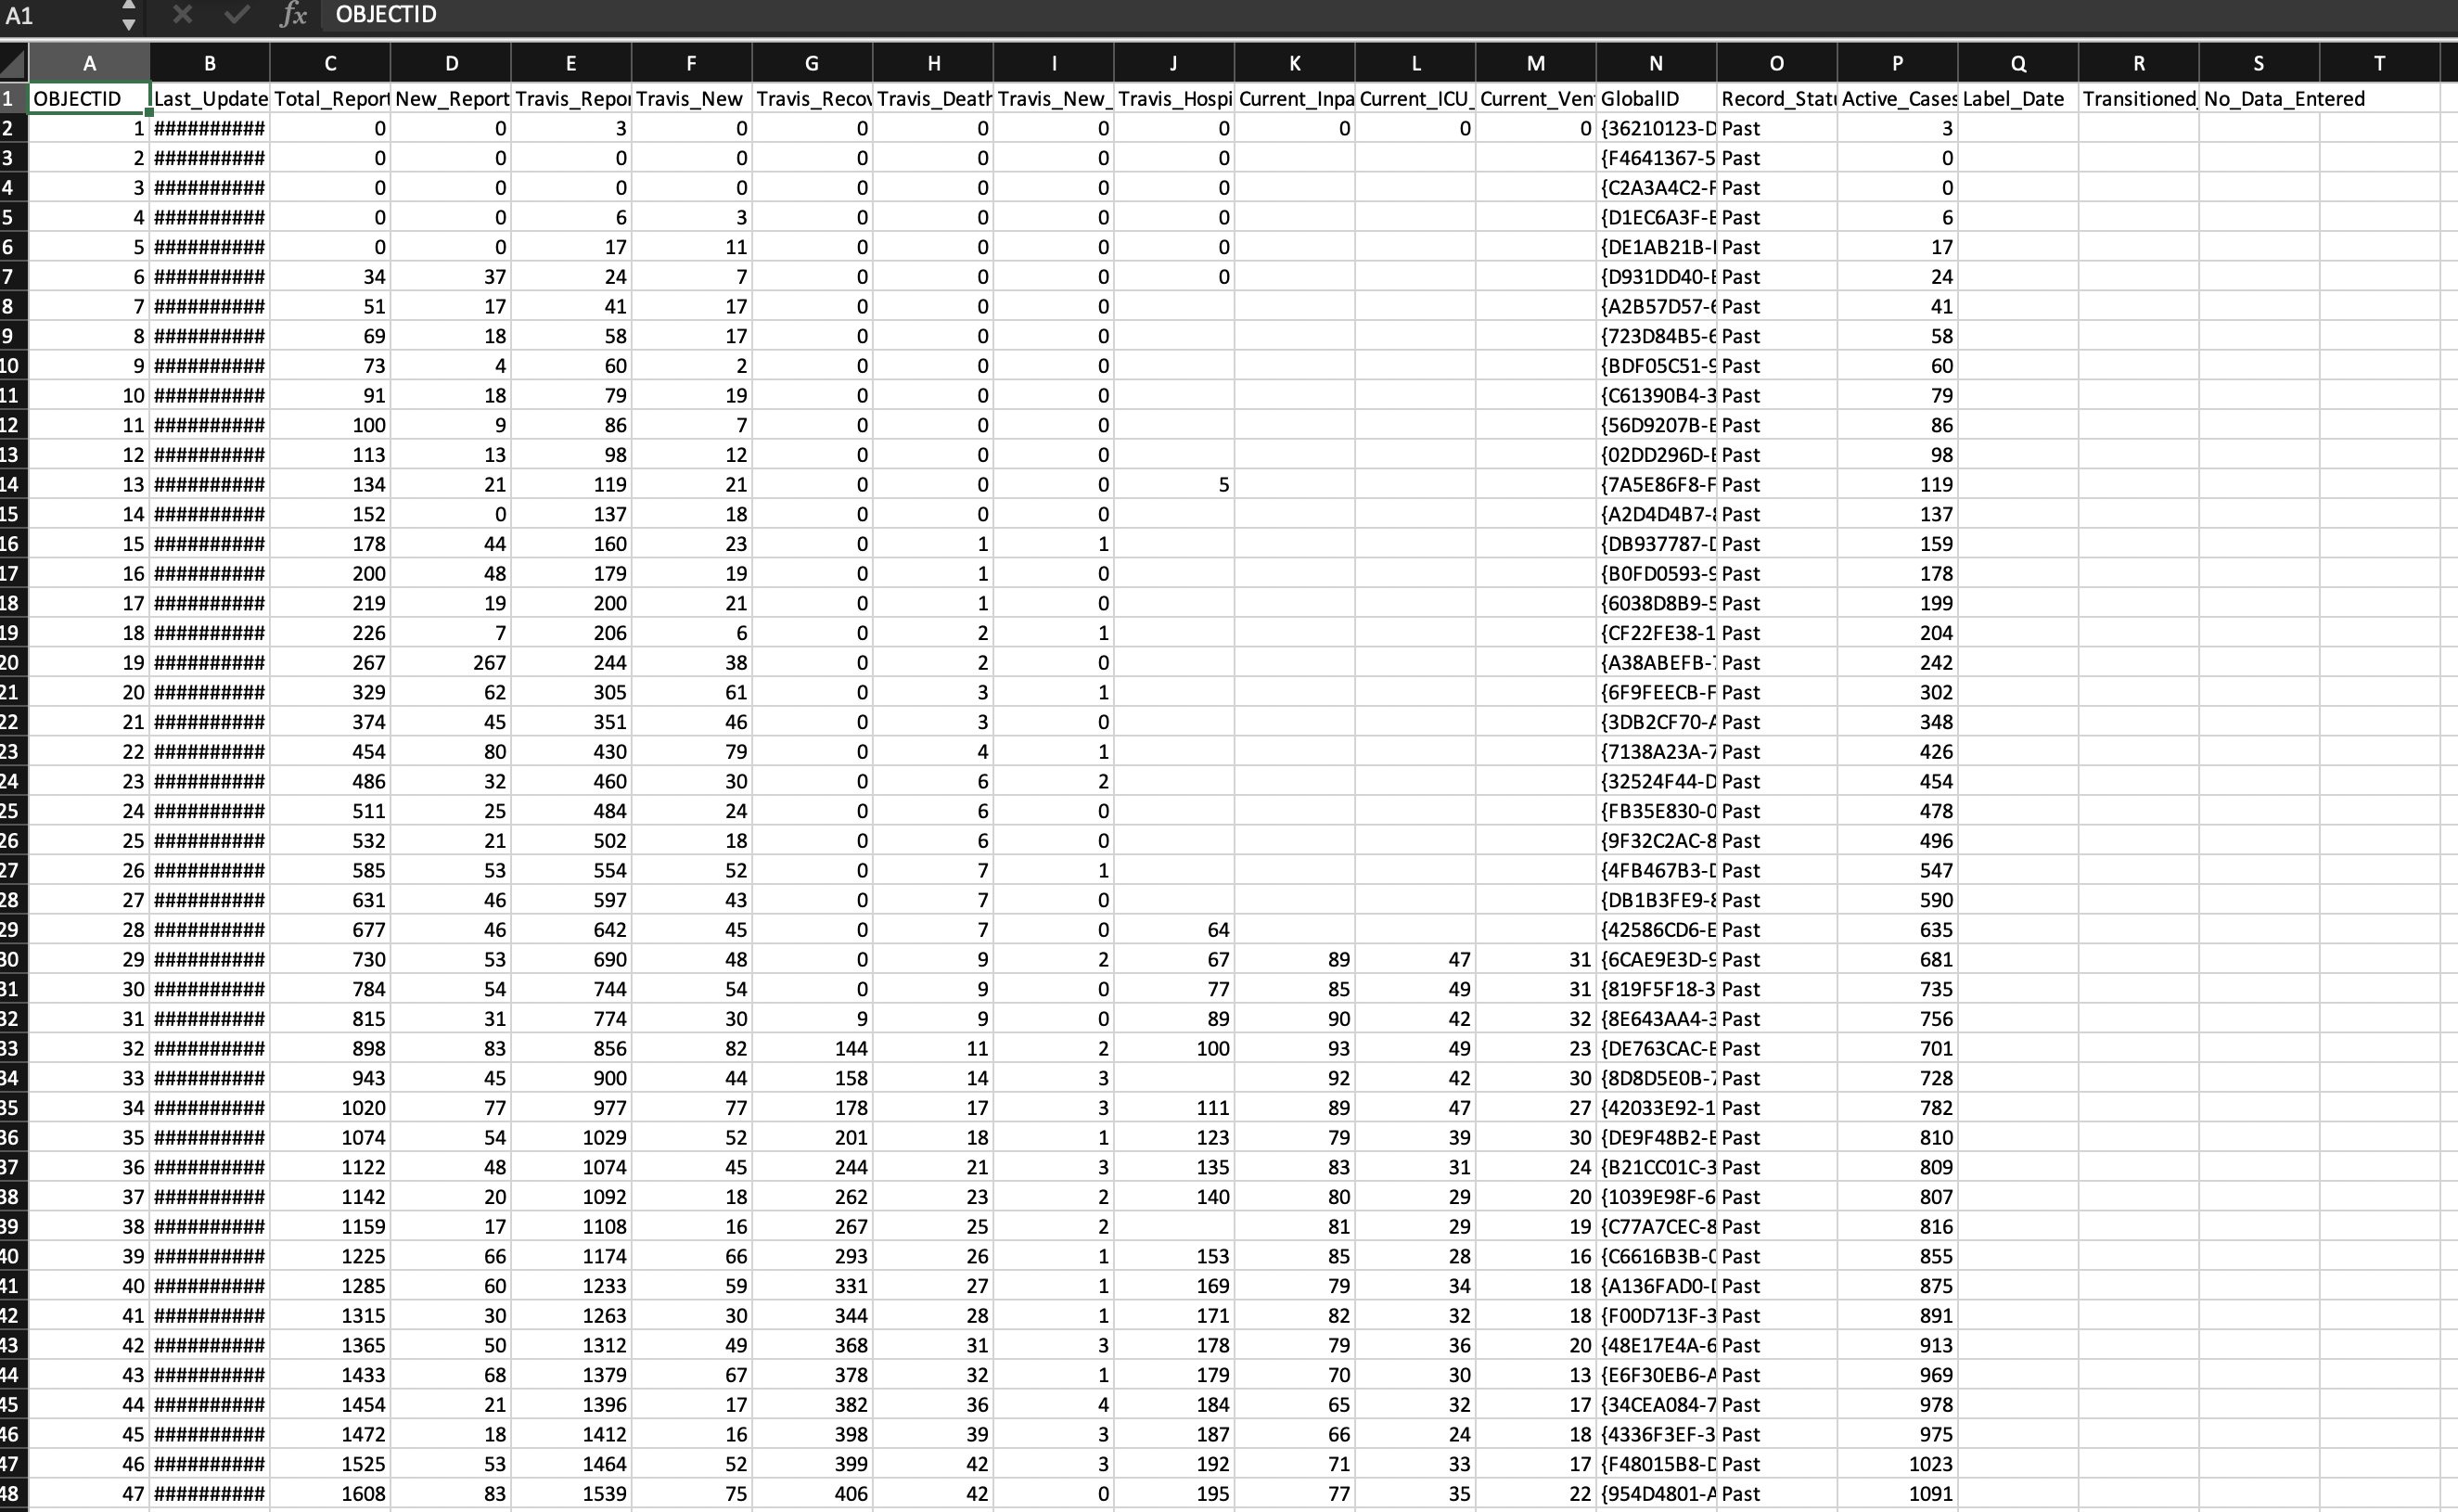

<h3>Intake CSV Export</h3>

While exporting the Intake csv, we had to add a filter for 'Found Location' to make sure that our dataset did not contain data for locations outside Travis County as our covid dataset was for Travis County.

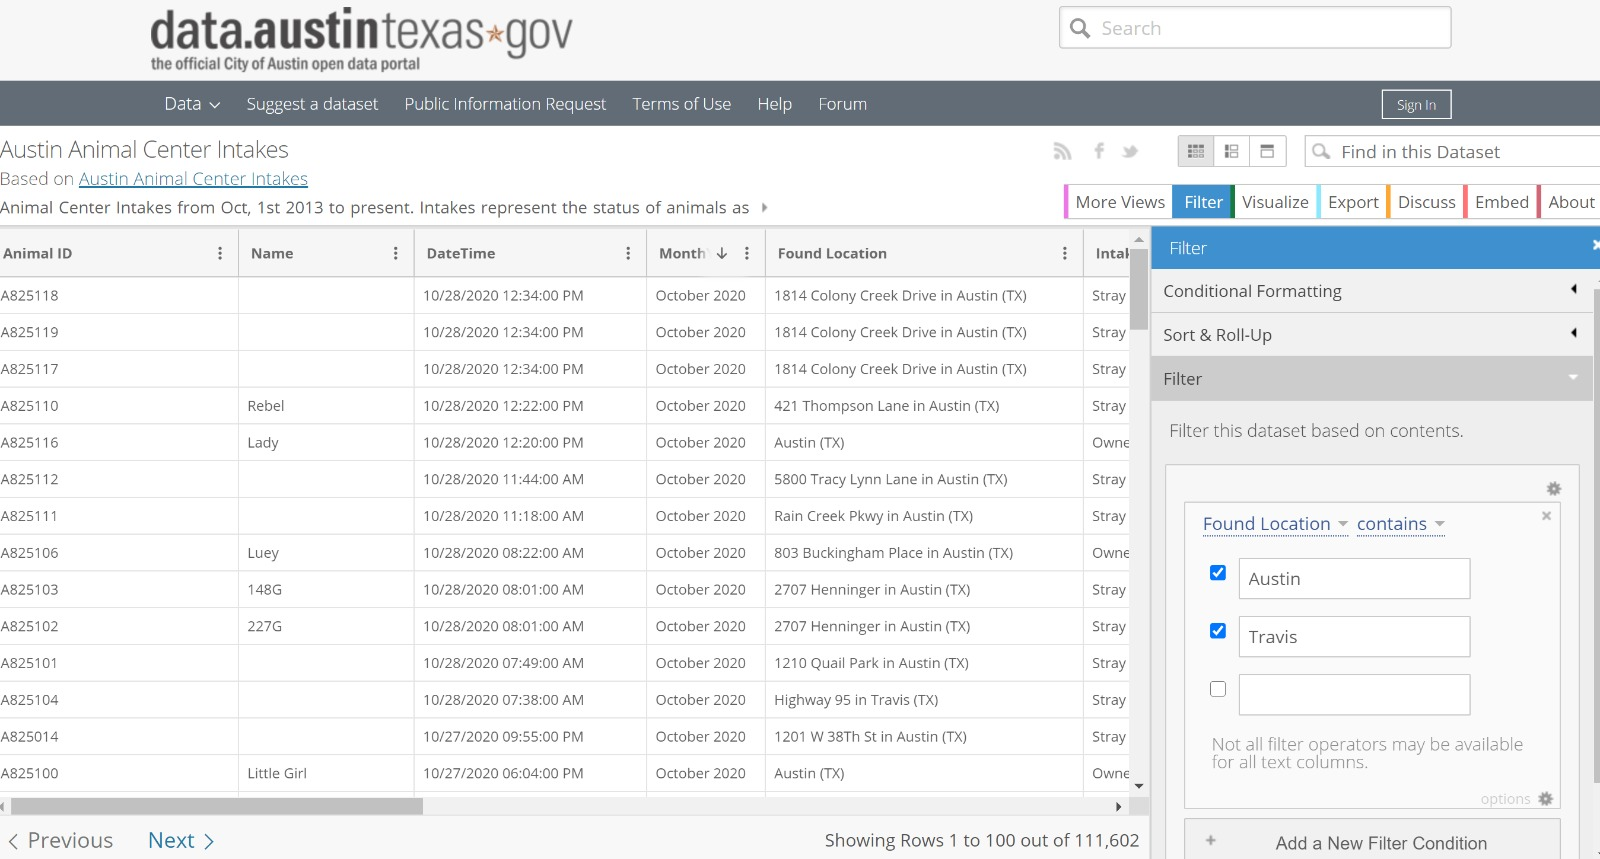

In [1]:
import pymysql.cursors
import csv
from datetime import datetime

# Setting PHPMYSQL connection

In [2]:
# First set up the connection to the server
connection = pymysql.connect(
            host="mariadb",
            user="root",  # mysql user
            passwd="",  # mysql passd
            db="finalproject_team11",
            autocommit=True,
            cursorclass=pymysql.cursors.DictCursor
            )

# Truncating Tables

In [17]:
#Truncate tables
with connection.cursor() as cursor:
    cursor.execute("truncate animals;")
    cursor.execute("truncate shelter_events;")
    cursor.execute("truncate covid_case_counts;")
    cursor.execute("truncate dates;")
    

# Inserting into Database

## Writing into animals, shelter_events & dates table from Austin_Animal_Center_Intake.csv file

In [4]:
with open('Austin_Animal_Center_Intakes.csv') as csvfile:
    myCSVReader = csv.DictReader(csvfile, delimiter=",", quotechar='"')
    with connection.cursor() as cursor:
        cursor.execute("SET autocommit = 0")
        for row in myCSVReader:
            
            #Select query to get id from animals table
            select_animals_sql = """
                            SELECT id
                            FROM animals
                            WHERE original_animal_id = %(original_animal_id)s
                            """
            
            #Insert query for animals table
            insert_animals_sql = """
                                INSERT INTO animals(original_animal_id,name,animal_type,breed,color)
                                VALUE (%(original_animal_id)s,%(animal_name)s,%(animal_type)s,%(breed)s,%(color)s);
                                """
            
            #Insert query for shelter_events table
            insert_shelter_events_sql = """
                                INSERT INTO shelter_events(animal_id,date_time,intake_outcome_type,event_type)
                                VALUE (%(animal_id)s,%(date_time)s,%(intake_outcome_type)s,%(event_type)s);
                                """
            
            #Insert query for dates table
            insert_dates_sql = """
                            INSERT INTO dates(shelter_id, case_date)
                            VALUE (%(shelter_id)s,%(date_time)s);
                            """
            
            #Format date
            date_from_dict = row['DateTime'][0:10]
            myPythonDate = datetime.strptime(date_from_dict, "%m/%d/%Y")
            
            #param dict for intake queries
            param_dict_intake = { "original_animal_id": row['Animal ID'],
                                  "animal_name": row['Name'],
                                  "animal_type": row['Animal Type'],
                                  "breed": row['Breed'],
                                  "color": row['Color'],
                                  "date_time": myPythonDate,
                                  "intake_outcome_type": row['Intake Type'],
                                  "event_type": "Intake" }
        
            #Execute select query to check if id exists
            cursor.execute(select_animals_sql, param_dict_intake)
            
            #Select query results
            results = cursor.fetchall()
            
            
            #If animal id does not exist in animals table
            if (len(results) == 0):
                
                #Insert record into animals table
                cursor.execute(insert_animals_sql, param_dict_intake)
                
                animal_id = cursor.lastrowid # get id of newly created row in animals.
             
            #If there is a record in animals table
            else:
                animal_id = results[0]["id"] # get found id.
            
            
            #Add animal_id to param_dict_intake
            param_dict_intake["animal_id"] = animal_id            

            #Execute shelter_events insert query
            cursor.execute(insert_shelter_events_sql, param_dict_intake)

            #Add shelter_id to param_dict_intake
            param_dict_intake["shelter_id"] = cursor.lastrowid
            
            #Insert record into dates table
            cursor.execute(insert_dates_sql, param_dict_intake)

        cursor.execute("COMMIT")

## Writing into animals, shelter_events & dates table from Austin_Animal_Center_Outcomes.csv file

In [7]:
with open('Austin_Animal_Center_Outcomes.csv') as csvfile:
    myCSVReader = csv.DictReader(csvfile, delimiter=",", quotechar='"')
    with connection.cursor() as cursor:
        cursor.execute("SET autocommit = 0")
        for row in myCSVReader:
            
            #Select query to get id from animals table
            select_animals_sql = """
                            SELECT id
                            FROM animals
                            WHERE original_animal_id = %(original_animal_id)s
                            """
            
            #Insert query for animals table
            insert_animals_sql = """
                                INSERT INTO animals(original_animal_id,name,animal_type,breed,color)
                                VALUE (%(original_animal_id)s,%(animal_name)s,%(animal_type)s,%(breed)s,%(color)s);
                                """
            
            #Insert query for shelter_events table
            insert_shelter_events_sql = """
                                INSERT INTO shelter_events(animal_id,date_time,intake_outcome_type,event_type)
                                VALUE (%(animal_id)s,%(date_time)s,%(intake_outcome_type)s,%(event_type)s);
                                """
            
            #Insert query for dates table
            insert_dates_sql = """
                            INSERT INTO dates(shelter_id, case_date)
                            VALUE (%(shelter_id)s,%(date_time)s);
                            """
            
            #Format date
            date_from_dict = row['DateTime'][0:10]
            myPythonDate = datetime.strptime(date_from_dict, "%m/%d/%Y")
            
            #param dict for outcome csv queries
            param_dict_outcome = { "original_animal_id": row['Animal ID'],
                                  "animal_name": row['Name'],
                                  "animal_type": row['Animal Type'],
                                  "breed": row['Breed'],
                                  "color": row['Color'],
                                  "date_time": myPythonDate,
                                  "intake_outcome_type": row['Outcome Type'],
                                  "event_type": "Outcome" }
        
            #Execute select query to check if id exists
            cursor.execute(select_animals_sql, param_dict_outcome)
            
            #Select query results
            results = cursor.fetchall()
            
            
            #If animal id does not exist in animals table
            if (len(results) == 0):
                
                #Insert record into animals table
                cursor.execute(insert_animals_sql, param_dict_outcome)
                
                animal_id = cursor.lastrowid # get id of newly created row in animals.
             
            #If there is a record in animals table
            else:
                animal_id = results[0]["id"] # get found id.
            
            
            #Add animal_id to param_dict_intake
            param_dict_outcome["animal_id"] = animal_id

            #Execute shelter_events insert query
            cursor.execute(insert_shelter_events_sql, param_dict_outcome)

            #Add shelter_id to param_dict_intake
            param_dict_outcome["shelter_id"] = cursor.lastrowid
            
            #Insert record into dates table
            cursor.execute(insert_dates_sql, param_dict_outcome)

        cursor.execute("COMMIT")

### Data inserted into animals table

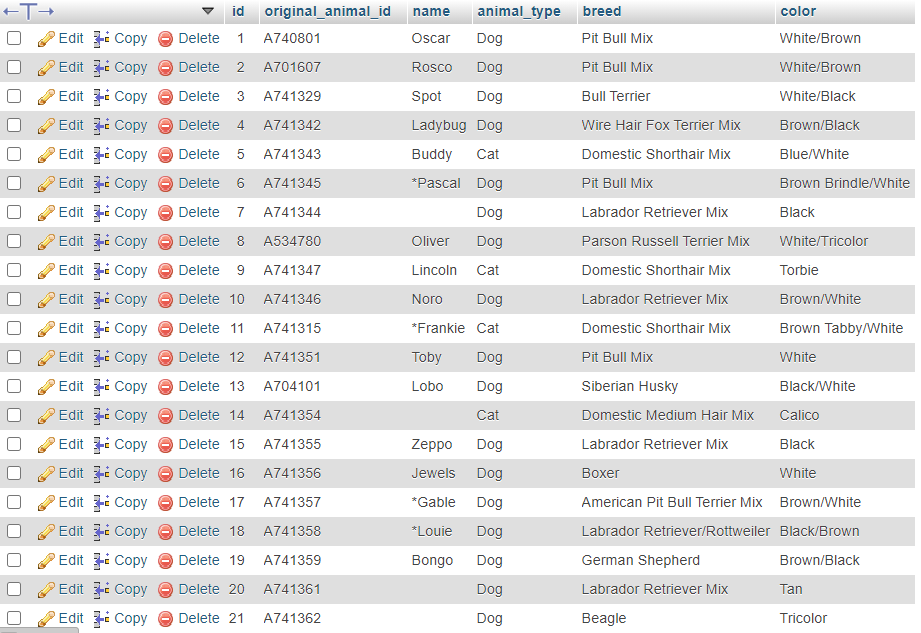

### Data inserted into shelter_events table

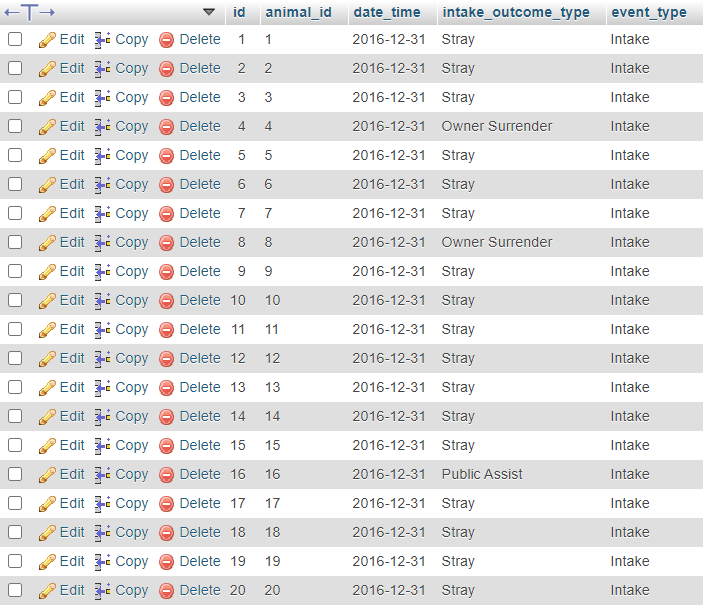

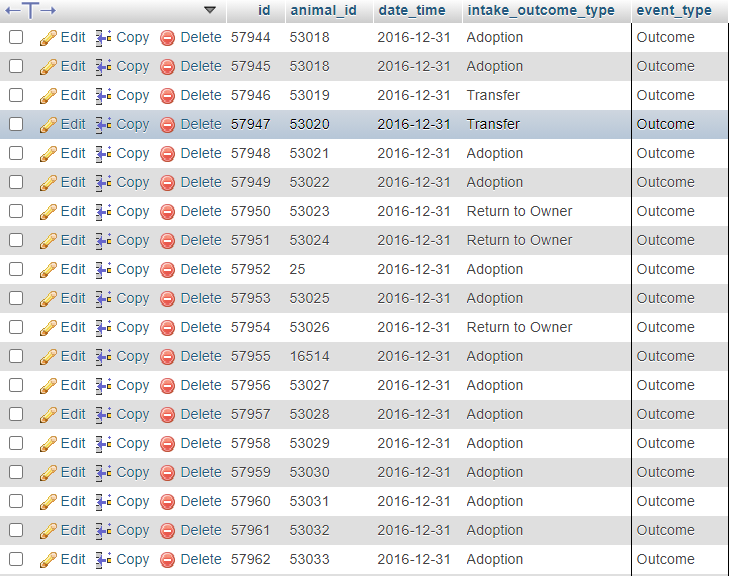

### Data inserted into dates table

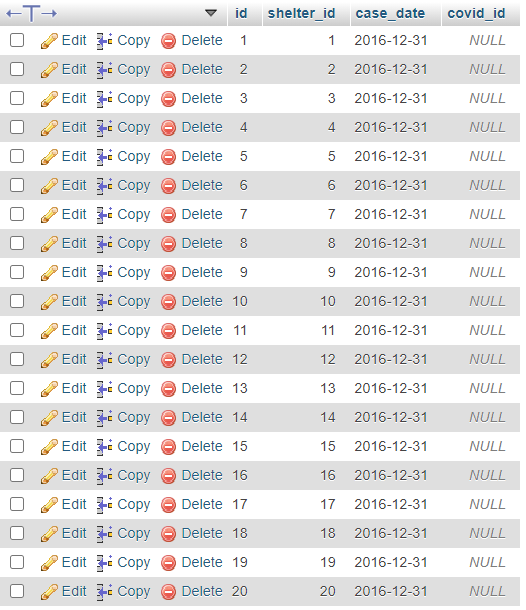

## Writing into covid_case_counts and updating dates tables from Austin_Travis_County_COVID19_Daily_Counts.csv file

In [18]:
with open('Austin_Travis_County_COVID19_Daily_Counts.csv') as csvfile:
    myCSVReader = csv.DictReader(csvfile, delimiter=",", quotechar='"')
    with connection.cursor() as cursor:
        cursor.execute("SET autocommit = 0")
        for row in myCSVReader:
            
            #Insert query for covid_case_counts
            insert_covid_counts_sql = """
                                    INSERT INTO covid_case_counts(reported_date,reported_cases,death_count,active_cases)
                                    VALUE (%(reported_date)s,%(reported_cases)s,%(death_count)s,%(active_cases)s); """
            
            #Update query for dates table
            update_dates_sql = "UPDATE dates SET covid_id = %(covid_id)s WHERE case_date = %(reported_date)s"
            
            #Format date
            date_from_dict = row['Last_Update'][0:10]
            myPythonDate = datetime.strptime(date_from_dict, "%Y/%m/%d")
            
            #Param_dict
            param_dict_covid_case = { "reported_date": myPythonDate,
                         "death_count": int(row['Travis_Deaths']),
                         "active_cases": int(row['Active_Cases']) }
            
            if row['New_Reported'] != "":
                param_dict_covid_case["reported_cases"] = int(row['New_Reported'])
            else:
              #  param_dict_covid_case["reported_cases"] = NULL
                insert_covid_counts_sql = """
                                    INSERT INTO covid_case_counts(reported_date,death_count,active_cases)
                                    VALUE (%(reported_date)s,%(death_count)s,%(active_cases)s); """
            
            
            #Execute query to insert into covid_case_counts table
            cursor.execute(insert_covid_counts_sql, param_dict_covid_case)
            
            #Add covid_id to param_dict_covid_case
            param_dict_covid_case["covid_id"] = cursor.lastrowid
                
            #Update dates table with covid id wherever date matches
            cursor.execute(update_dates_sql, param_dict_covid_case)
                
        cursor.execute("COMMIT")

### Data inserted in covid_case_counts table

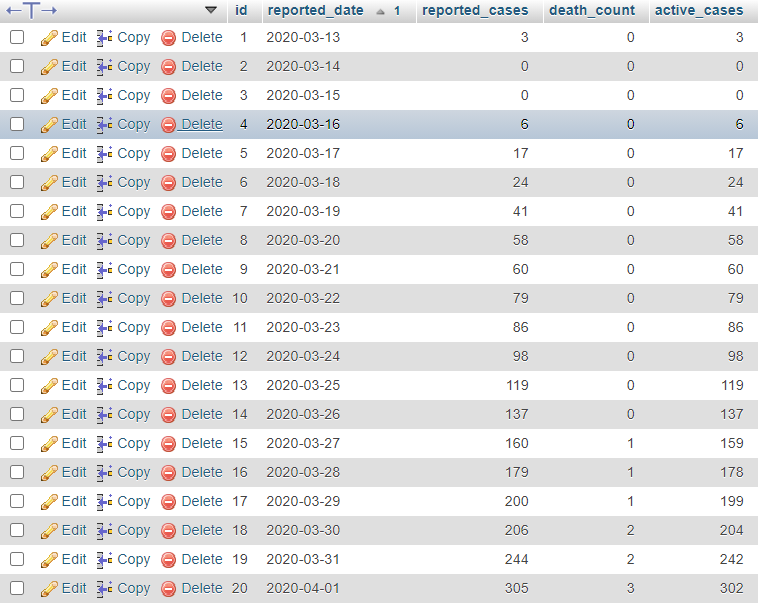

### dates table update with covid_id

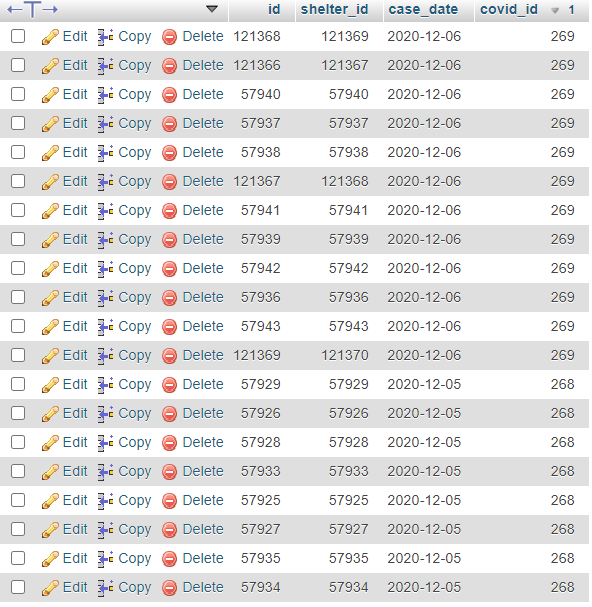

## SQL queries for fetching data for analysis

#### We used the below queries to fetch the required data from phpmyadmim for analysis. We exported the CSVs to use in Tableau.

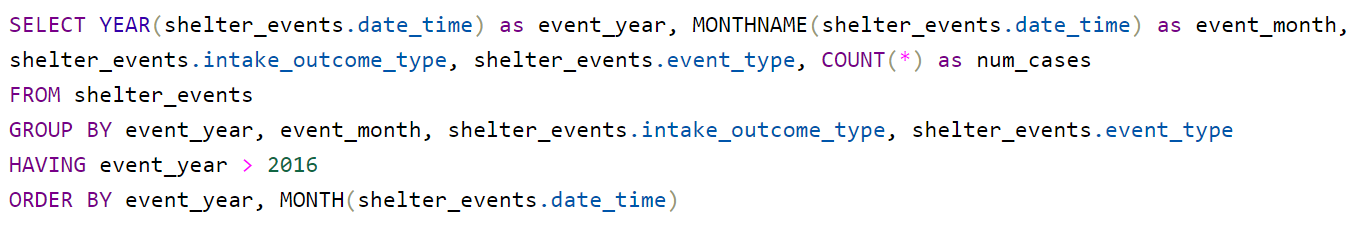

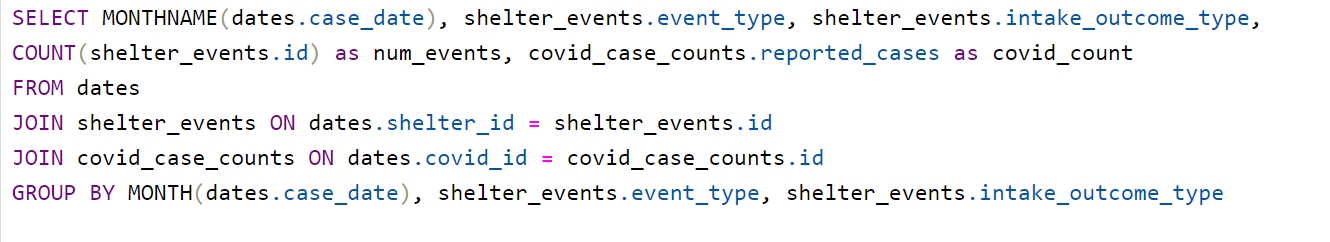

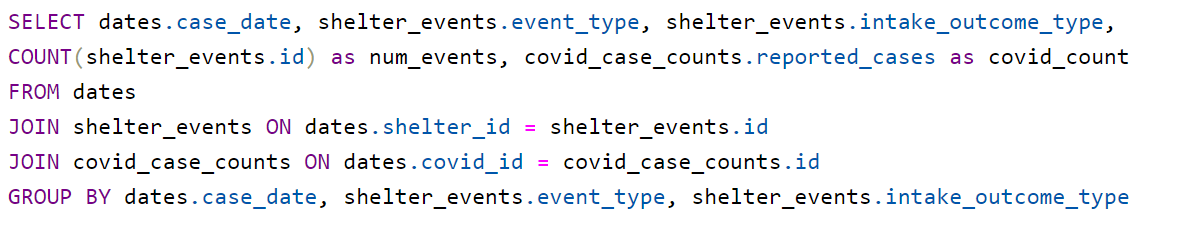

## CSVs used for Analysis

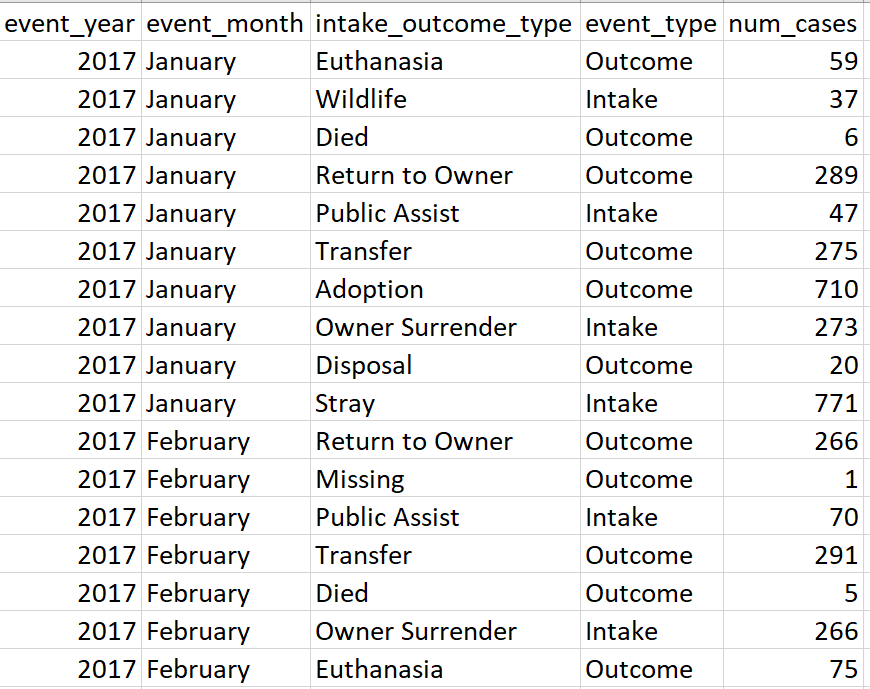

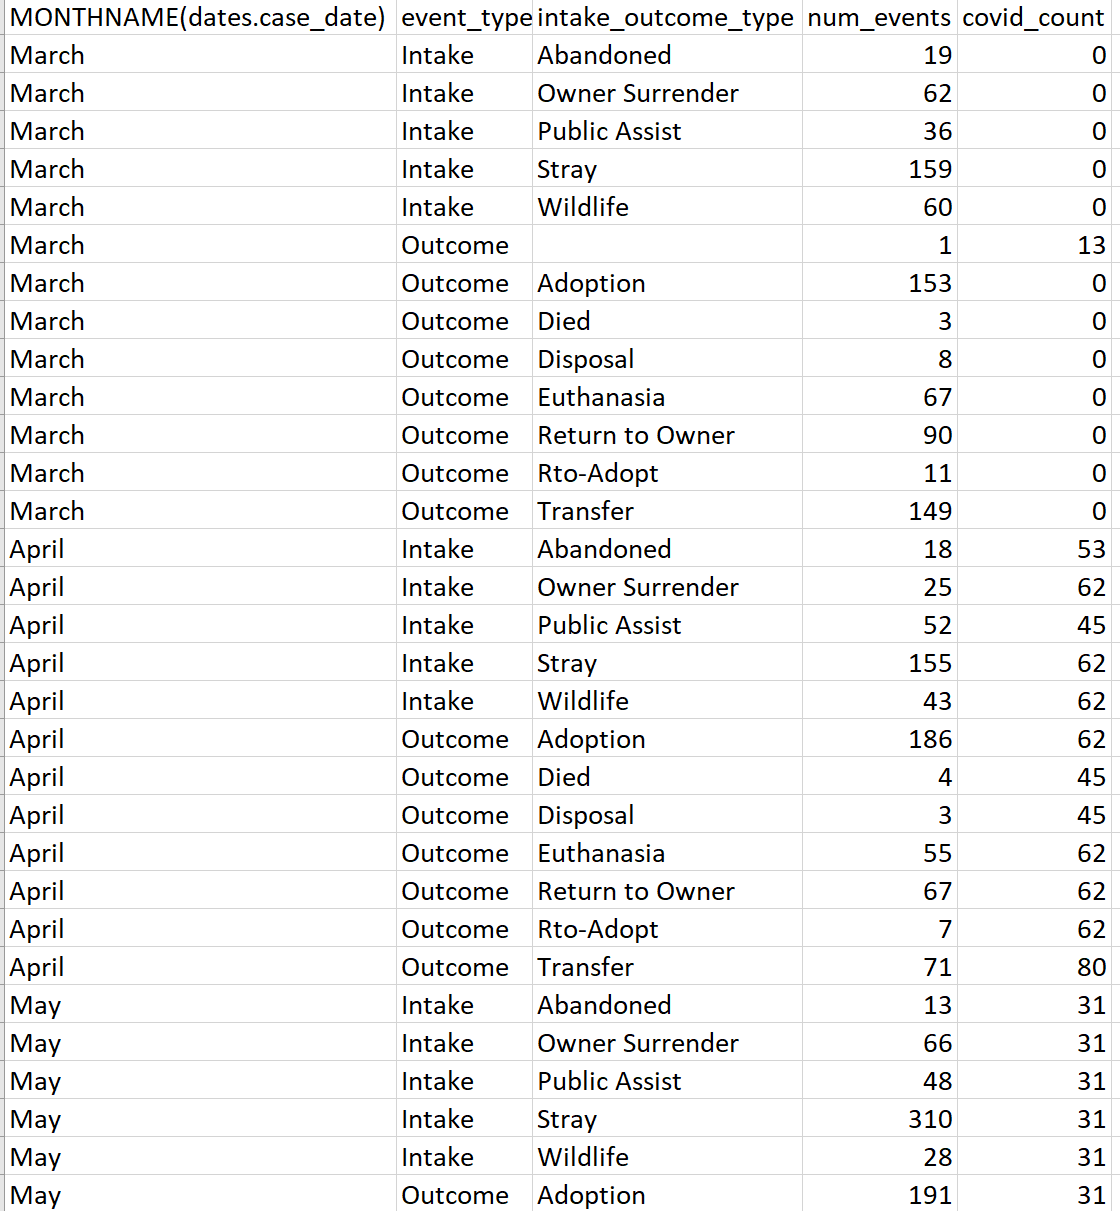

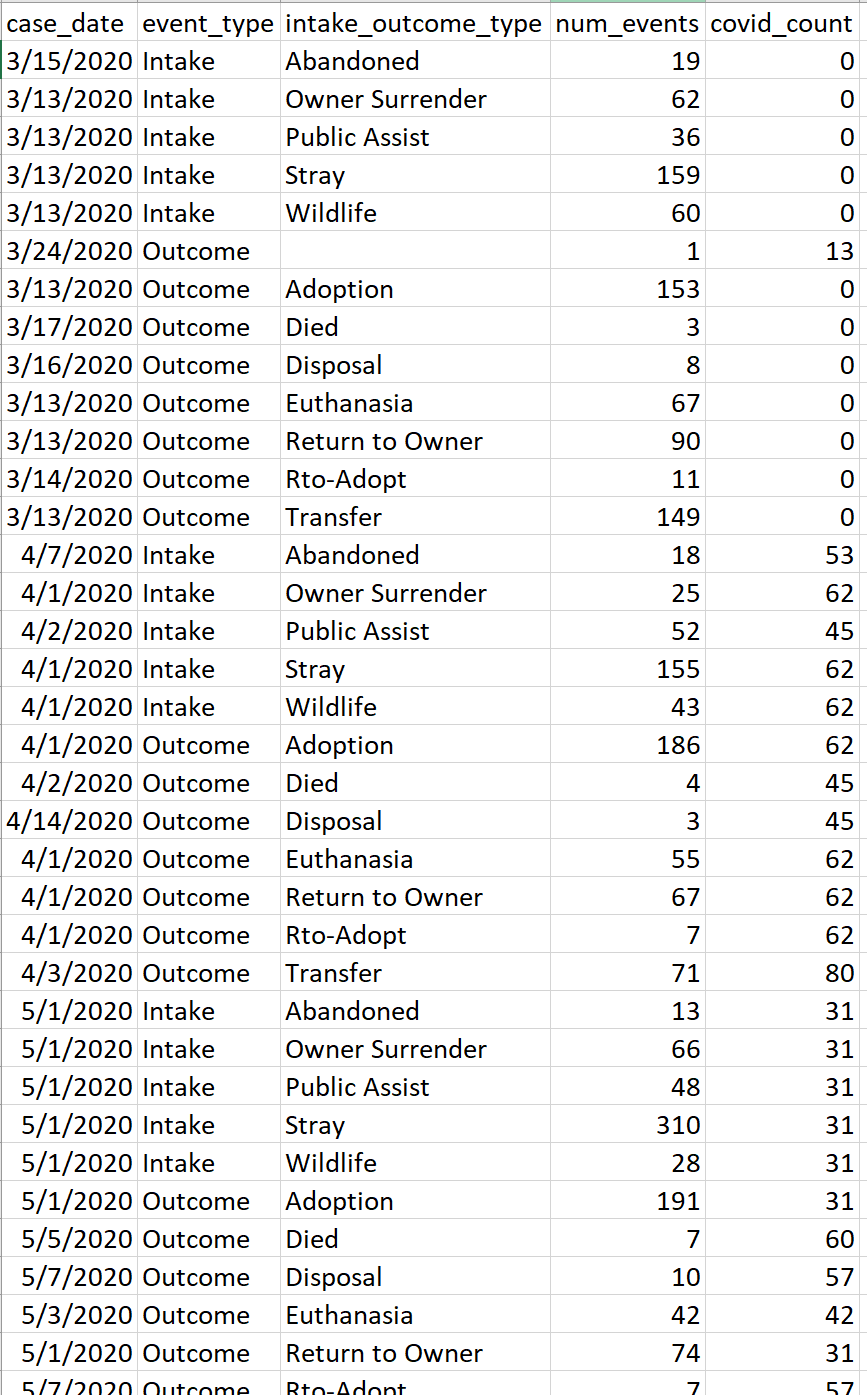

# Data Analysis using Tableau

We used Tableau to analyze the data. Our goal was to see how the year 2020 compared to the previous years in terms of Intakes/Outcomes for the Austin Animal Shelter and compare the number of intakes/outcomes to the number of reported COVID cases from March 2020 - December 2020.

### Intake Trends

We chose to focus on two intake types - 'Stray' and 'Owner Surrender'. We have two line charts that compare the total number of Stray/Owner surrender intakes for each month for the years 2017 - 2020. We observed that the number of Stray/Owner Surrender intakes were significantly lower in the year 2020. For the years 2017 - 2019, the number of intakes were gradually increasing during the months of Feb - May, but in the year 2020, the Stray intakes decreased during these months.

Note: The chart comparing Stray and Owner Surrender Intakes with COVID starts from 13th March, 2020 to take the covid dataset into account. The other individual charts for comparing trends for 'Stray' and 'Owner surrender' take the total number of events in each month into account.

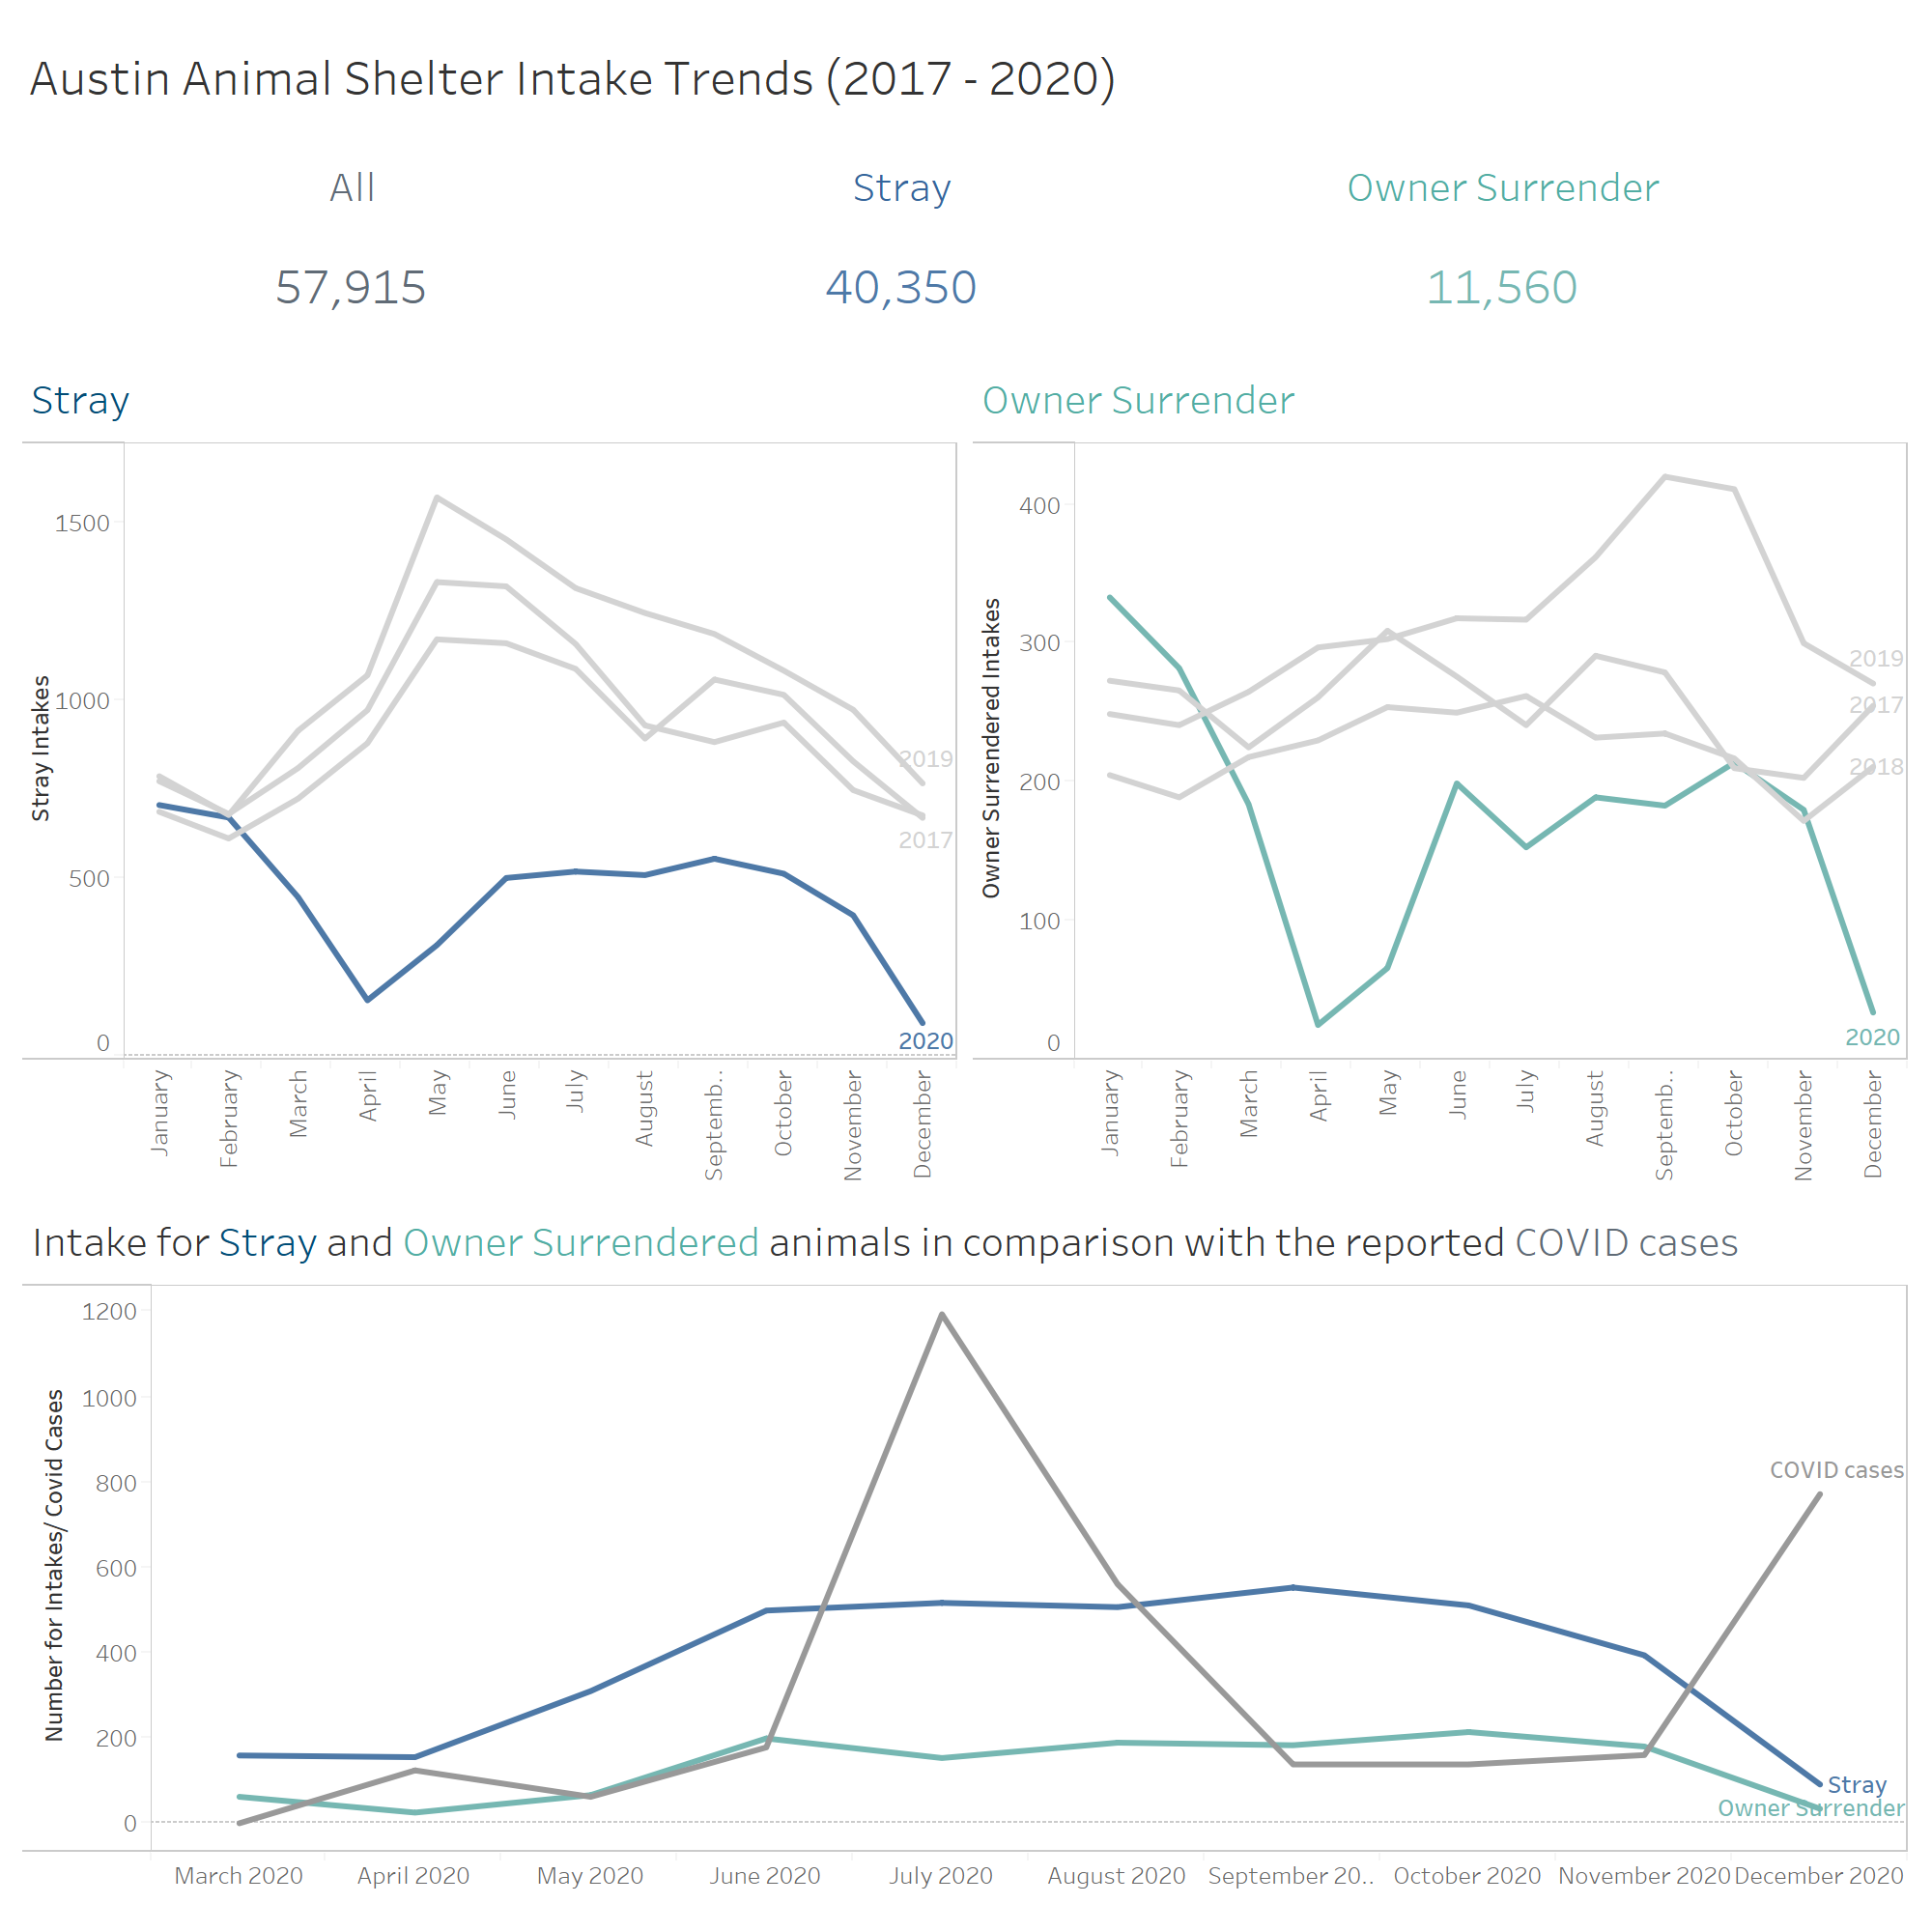

### Outcome Trends

We chose to focus on two outcome types - 'Adoption' & 'Transfer'. We have two line charts that compare the total number of Adoption/Transfer outcomes for each month for the years 2017 - 2020. We observed that although the overall adoption and transfer outcomes were lower in the year 2020, the number of adoptions gradually increased from July to November in 2020.

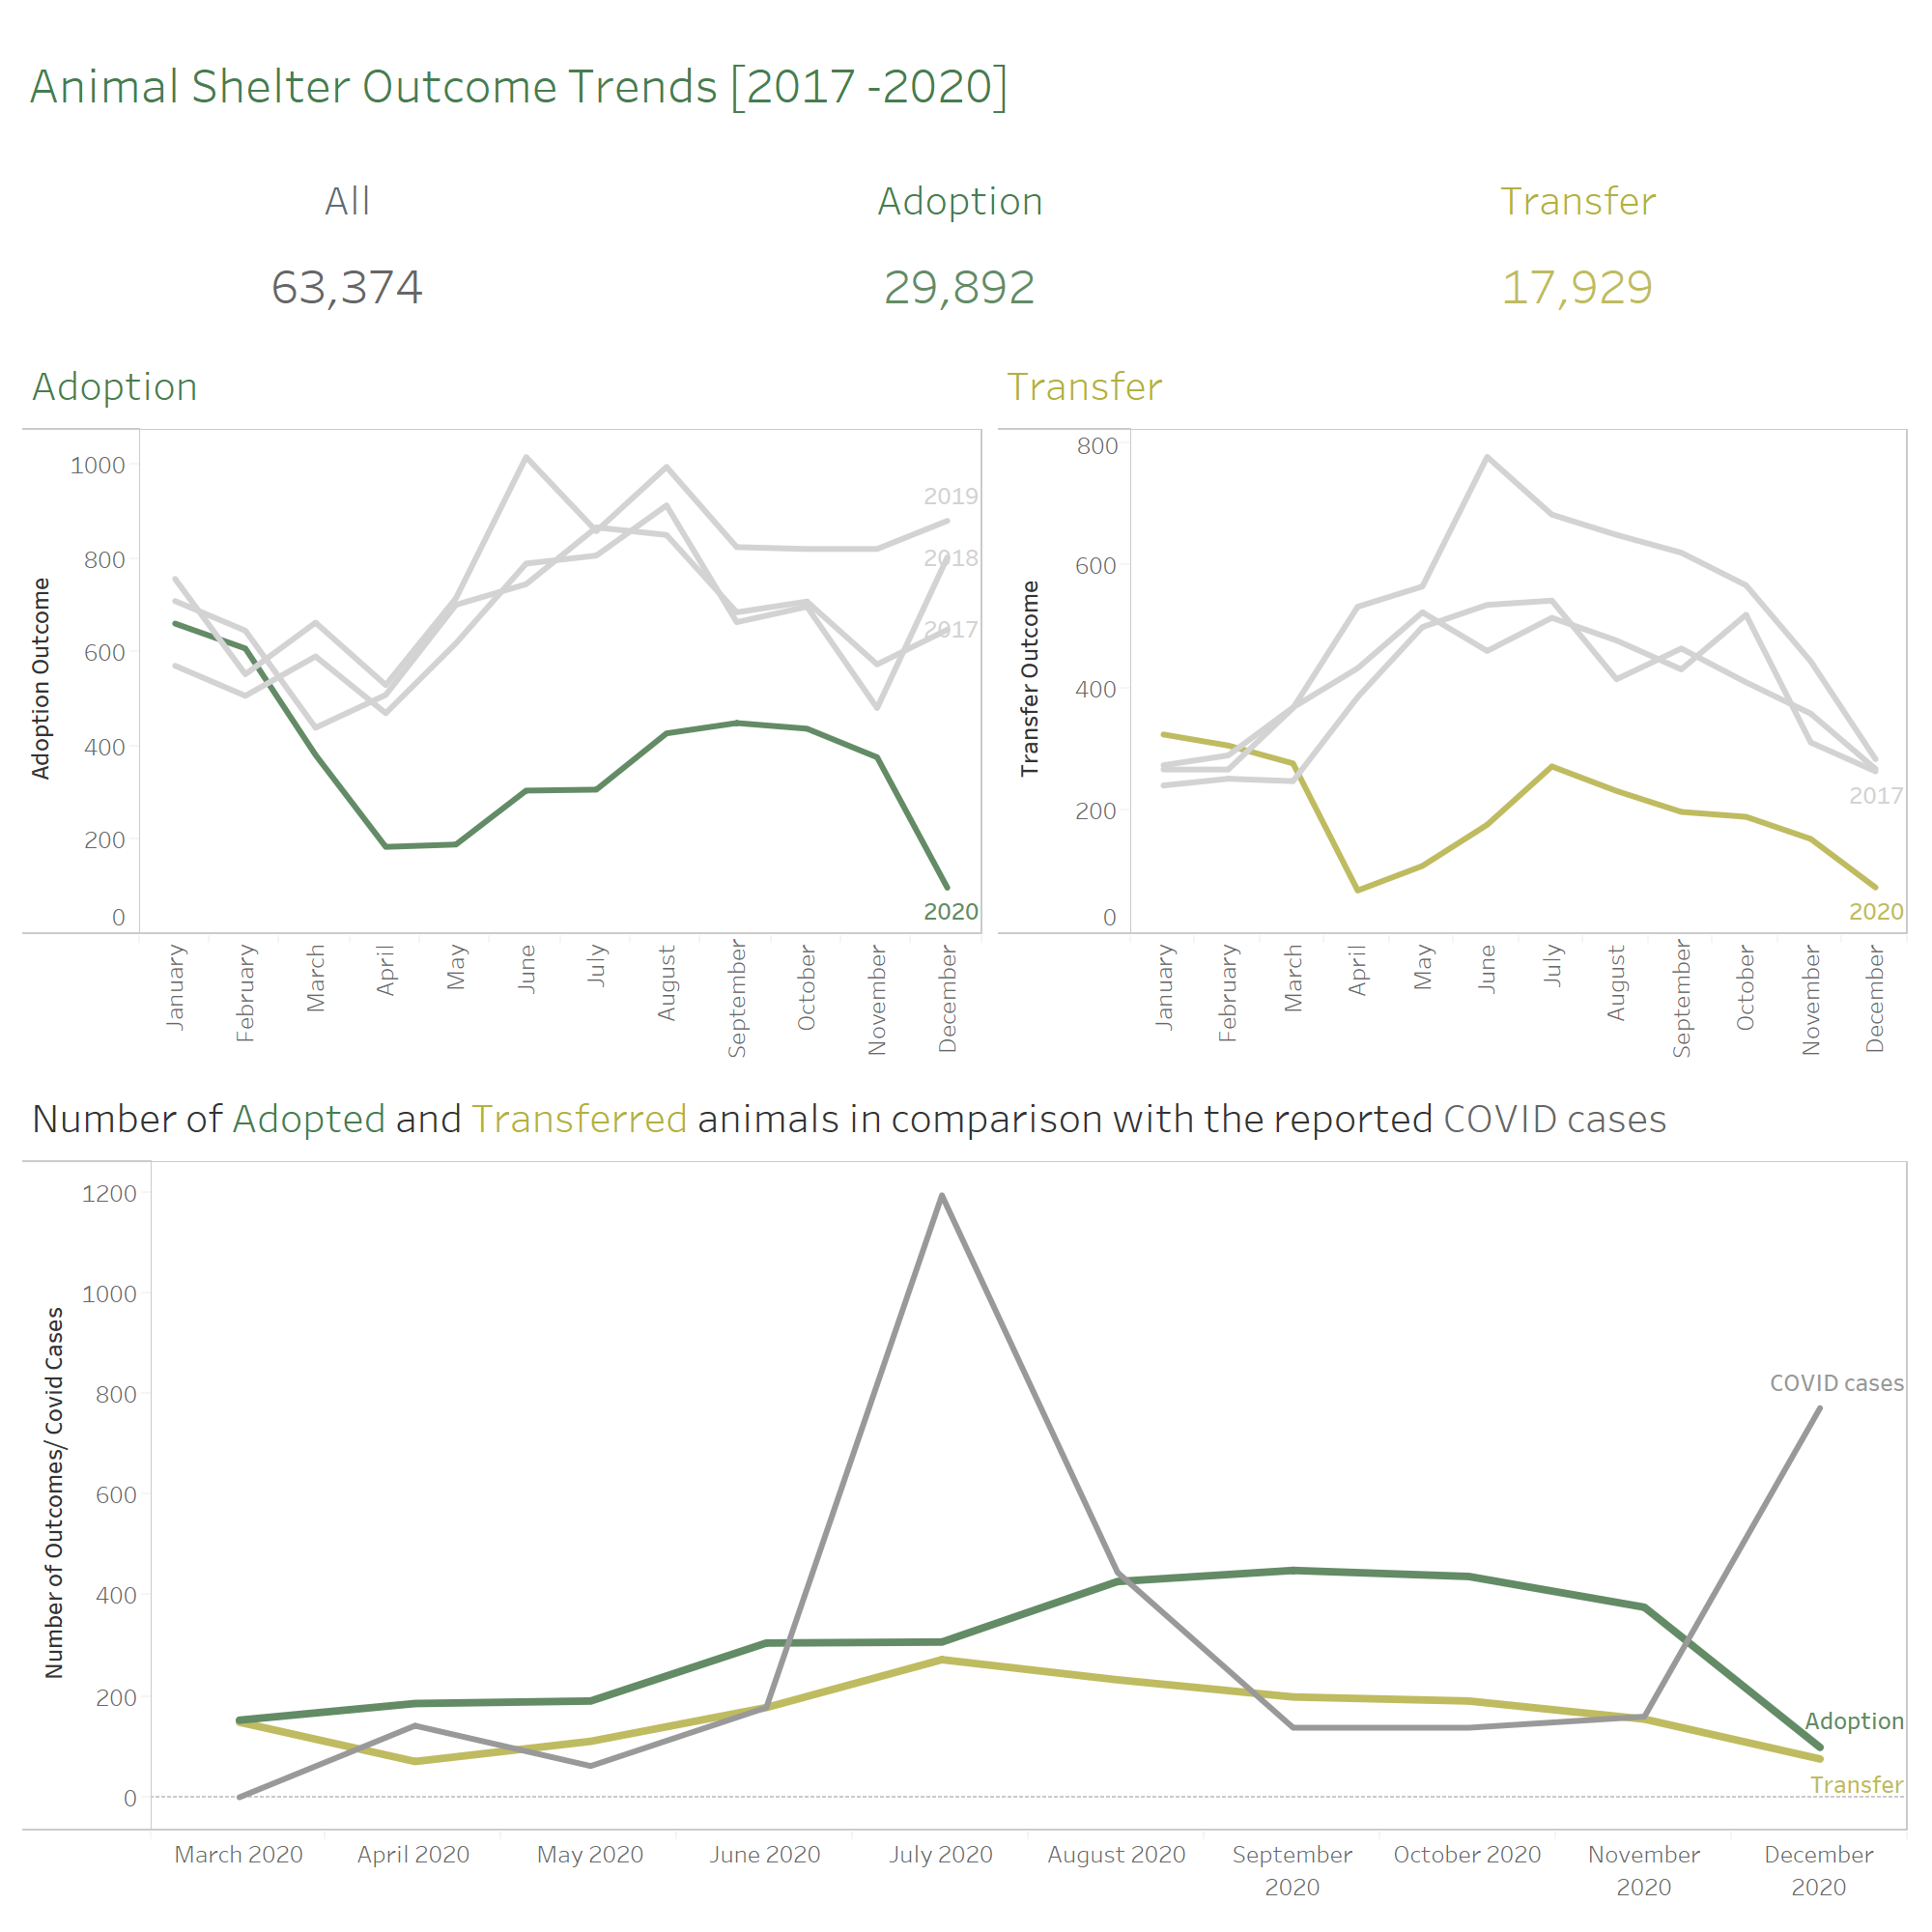

## Challenges

One of the challenges we faced was with the date format. As the format was different across CSVs, we had to format the date in python before inserting into the database. As we had a lot of records to process, the insertion was taking a long time. We tried to address this by performing a COMMIT only after all the records were inserted instead of autocommit. We also had to take care of empty values while inserting data into the database. Another confusion was regarding the insertion of data into the dates table. We were initially doing this at the end, after inserting data into the animals and shelter_events tables. But, after receiving feedback of a better way to insert data, we modified our code to insert data into the dates table along with the animals and shelter_events table.

# Tool for Analysis

We decided to use Tableau for analysis. We were familiar with this tool as we had worked with it previously in the Data Storytelling course. 